StyleGAN2 사용 방법 설명 링크.

https://www.notion.so/Style-GAN-b391556b68c441728a56c87260c2f718

tensorflow 버전 1을 사용 해야 한다.

tensorflow 버전이 1이 아니면 실행이 안됩니다.

In [1]:
import tensorflow as tf
tf.__version__

'1.15.0'

주피터 노트북 GPU 설치 방법 링크 :
https://airy-attempt-22a.notion.site/GPU-184c32517fb944ce96606727b7601d51

In [2]:
# GPU가 돌아가는지 확인 하는 코드
from tensorflow.python.client import device_lib 
device_lib.list_local_devices() 
tf.test.is_gpu_available()
# True값이 나와야 함

True

In [3]:
!nvidia-smi

Tue Nov  9 10:32:50 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 496.49       Driver Version: 496.49       CUDA Version: 11.5     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ... WDDM  | 00000000:01:00.0 Off |                  N/A |
| N/A   49C    P0    27W /  N/A |    384MiB /  8192MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [4]:
# Download the code
%cd /content/

C:\content


구글 코랩 데스크탑 버전이 없는 경우.

다음 링크로 가서 구글 코랩 데스크탑 버전을 다운 받는다.

https://support.google.com/drive/answer/7329379#macos&zippy=%2C%EB%8D%B0%EC%8A%A4%ED%81%AC%ED%86%B1%EC%9A%A9-google-%EB%93%9C%EB%9D%BC%EC%9D%B4%EB%B8%8C-%EC%97%B4%EA%B8%B0%2C%EC%8B%9C%EC%8A%A4%ED%85%9C-%EC%9A%94%EA%B5%AC%EC%82%AC%ED%95%AD%2C%EB%8D%B0%EC%8A%A4%ED%81%AC%ED%86%B1%EC%9A%A9-google-%EB%93%9C%EB%9D%BC%EC%9D%B4%EB%B8%8C-%EB%8B%A4%EC%9A%B4%EB%A1%9C%EB%93%9C-%EB%B0%8F-%EC%84%A4%EC%B9%98%ED%95%98%EA%B8%B0%2Cmacos-high-sierra-%EC%9D%B4%EC%83%81%EC%97%90%EC%84%9C-%EB%8D%B0%EC%8A%A4%ED%81%AC%ED%86%B1%EC%9A%A9-google-%EB%93%9C%EB%9D%BC%EC%9D%B4%EB%B8%8C-%EC%82%AC%EC%9A%A9%ED%95%98%EA%B8%B0

데이터셋 zip파일을 풀어 경로 내에 넣습니다.

In [5]:
dataset_name = "train787"

import zipfile
path = "G:/내 드라이브/"
dataset = dataset_name + ".zip"
local_path = "C:/content/"
file_name = path + dataset
with zipfile.ZipFile(file_name, 'r') as zip:
   #zip.printdir()
   print('Extracting all the files now...') 
   zip.extractall(local_path + dataset_name) 
   print('Done!')

Extracting all the files now...
Done!


git에 공유되어 있는 stylegan2-ada를 다운받습니다.

content 경로로 이동해서 git clone을 사용 합니다.

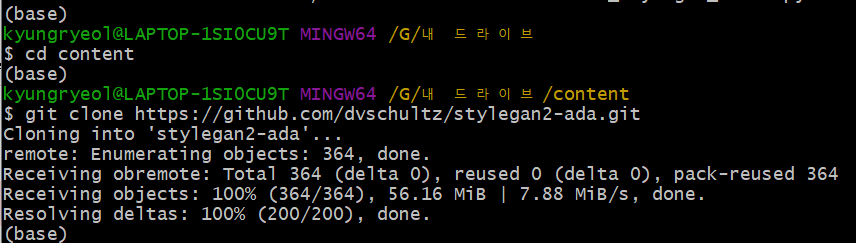

데이터셋, 다운로드 파일을 담을 디렉토리를 생성합니다.

In [6]:
# Download the code
%cd C:/content/
!git clone https://github.com/KyungRyeolBaek/stylegan2-ada.git
!mkdir downloads
!mkdir datasets

C:\content


fatal: destination path 'stylegan2-ada' already exists and is not an empty directory.
하위 디렉터리 또는 파일 downloads이(가) 이미 있습니다.
하위 디렉터리 또는 파일 datasets이(가) 이미 있습니다.


이미지를 tensorflow에 넣을 데이터 형식으로 변환 시킵니다.

In [7]:
%cd G:/내 드라이브/content/

# 이미지 경로 설정
dataset_folder_name = 'train787' # 이미지가 들어 있는 폴더 이름
dataset_path = "C:/content/" + dataset_folder_name # 이미지가 들어있는 폴더의 전체 경로

# 파일을 추가로 생성 할 필요 없습니다.
%cd C:/content/stylegan2-ada
!python dataset_tool.py create_from_images C:/content/datasets/{dataset_name} {dataset_path} # 이미지 처리 후 저장할 곳, 이미지 경로

G:\내 드라이브\content
C:\content\stylegan2-ada


2021-11-09 10:33:01.507870: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library cudart64_100.dll
usage: dataset_tool.py [-h]
                       {info,display,extract,compare,create_mnist,create_mnistrgb,create_cifar10,create_cifar100,create_svhn,create_lsun,create_lsun_wide,create_celeba,create_from_images,create_from_images_raw,create_from_image_folders,create_from_image_folders_raw,create_from_images_with_labels,create_from_hdf5,convert_to_hdf5,hdf5_from_images,unpack,pack,extract_brecahad_crops}
                       ...
dataset_tool.py: error: unrecognized arguments: # 이미지 처리 후 저장할 곳, 이미지 경로


아래 파라미터에 대한 설명을 보고 수정 가능 합니다.

In [8]:
%cd C:/content/stylegan2-ada
!python train.py --help

C:\content\stylegan2-ada
usage: train.py [-h] --outdir DIR [--gpus INT] [--snap INT] [--seed INT] [-n]
                --data PATH [--res INT] [--mirror BOOL] [--mirrory BOOL]
                [--use-raw BOOL] [--metrics LIST] [--metricdata PATH]
                [--cfg {auto,11gb-gpu,11gb-gpu-complex,24gb-gpu,24gb-gpu-complex,48gb-gpu,48gb-2gpu,stylegan2,paper256,paper512,paper1024,cifar,cifarbaseline,aydao}]
                [--lrate FLOAT] [--ttur BOOL] [--gamma FLOAT] [--nkimg INT]
                [--kimg INT] [--topk FLOAT] [--aug {noaug,ada,fixed,adarv}]


2021-11-09 10:33:03.172811: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library cudart64_100.dll


                [--p FLOAT] [--target TARGET] [--initstrength INITSTRENGTH]
                [--augpipe {blit,geom,color,filter,noise,cutout,bg,bgc,bgcf,bgcfn,bgcfnc}]
                [--cmethod {nocmethod,bcr,zcr,pagan,wgangp,auxrot,spectralnorm,shallowmap,adropout}]
                [--dcap FLOAT] [--resume RESUME] [--freezed INT]

Train a GAN using the techniques described in the paper
"Training Generative Adversarial Networks with Limited Data".

optional arguments:
  -h, --help            show this help message and exit

general options:
  --outdir DIR          Where to save the results (required)
  --gpus INT            Number of GPUs to use (default: 1 gpu)
  --snap INT            Snapshot interval (default: 50 ticks)
  --seed INT            Random seed (default: 1000)
  -n, --dry-run         Print training options and exit

training dataset:
  --data PATH           Training dataset path (required)
  --res INT             Dataset resolution (default: highest available)
  --mirror 

학습 진행

In [17]:
2# output directory
output_dir = 'C:/content/results/' + dataset_name + "/"

# config
config = "stylegan2"

# gamma
gamma = 1

#how often should the model generate samples and a .pkl file
snapshot_count = 1

#should the images be mirrored left to right?
mirrored = True
#should the images be mirrored top to bottom?
mirroredY = False

#metrics? 
metric_list = None
#
# this is the most important cell to update
#
# running it for the first time? set it to ffhq(+resolution)
# resuming? get the path to your latest .pkl file and use that
resume_from = "ffhq1024"

# make sure there is no space in the resume path. if there is any, use a backslash character to escape
# resume_from = '/content/drive/MyDrive/Colab\ Notebooks/results/pokemon-256/00001-pokemon-256-mirror-auto1-gamma1-resumecustom/network-snapshot-000036.pkl'

#don't edit this unless you know what you're doing :)
!python train.py --outdir={output_dir} \
                 --cfg={config} \
                 --snap={snapshot_count} \
                 --data=C:/content/datasets/{dataset_name} \
                 --mirror={mirrored} --mirrory={mirroredY} \
                 --gamma={gamma} \
                 --metrics={metric_list} \
                 --resume={resume_from}


Training options:
{
  "G_args": {
    "func_name": "training.networks.G_main",
    "fmap_base": 16384,
    "fmap_max": 512,
    "mapping_layers": 8,
    "num_fp16_res": 4,
    "conv_clamp": 256
  },
  "D_args": {
    "func_name": "training.networks.D_main",
    "mbstd_group_size": 4,
    "fmap_base": 16384,
    "fmap_max": 512,
    "num_fp16_res": 4,
    "conv_clamp": 256
  },
  "G_opt_args": {
    "beta1": 0.0,
    "beta2": 0.99,
    "learning_rate": 0.002
  },
  "D_opt_args": {
    "beta1": 0.0,
    "beta2": 0.99,
    "learning_rate": 0.002
  },
  "loss_args": {
    "func_name": "training.loss.stylegan2",
    "r1_gamma": 1.0
  },
  "augment_args": {
    "class_name": "training.augment.AdaptiveAugment",
    "tune_heuristic": "rt",
    "tune_target": 0.6,
    "apply_func": "training.augment.augment_pipeline",
    "apply_args": {
      "xflip": 1,
      "rotate90": 1,
      "xint": 1,
      "scale": 1,
      "rotate": 1,
      "aniso": 1,
      "xfrac": 1,
      "brightness": 1,
      

2021-11-09 13:35:59.942277: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library cudart64_100.dll
2021-11-09 13:36:01.354353: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2
2021-11-09 13:36:01.356741: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library nvcuda.dll
2021-11-09 13:36:01.393174: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1618] Found device 0 with properties: 
name: NVIDIA GeForce RTX 3070 Laptop GPU major: 8 minor: 6 memoryClockRate(GHz): 1.29
pciBusID: 0000:01:00.0
2021-11-09 13:36:01.393198: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library cudart64_100.dll
2021-11-09 13:36:01.395042: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library cublas64_100.dll
2021-11-09 13:36:01.398099: I